# Extra work 

## Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
train = pd.read_csv('/content/trainT.csv')

In [ ]:
df = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df['Sex'] = df['Sex'].apply(lambda sex:1 if sex=='male' else 0)
df['Age'] = (df['Age'].fillna(df['Age'].median()))
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# X = X.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def sigmoid(X,W,b):
  z = np.dot(X,W)+b
  return 1/(1+np.exp(-z))

def loss(y,y_hat):
  return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()

def update_vals(X,W,b,y,lr,m):
  y_hat = sigmoid(X,W,b)
  loss_val = loss(y,y_hat)
  dW = 1/m * np.dot(X.T, (y_hat - y))
  db = 1/m * np.sum(y_hat - y)
  W -= lr * dW
  b -= lr * db 
  
  return W,b

def fit(X, y, lr, epochs):
  W = np.zeros(X.shape[1])
  b = 0
  m=X.shape[0]
  for _ in tqdm_notebook(range(epochs)):
    W,b = update_vals(X,W,b,y,lr,m)
  
  return W,b

def predict(X,W,b):
  y_hat = sigmoid(X,W,b)
  return np.where( y_hat > 0.5, 1, 0 )

In [ ]:
W,b = fit(X_train,y_train,0.01,100)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predict(X_test,W,b),y_test)

0.4664179104477612

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


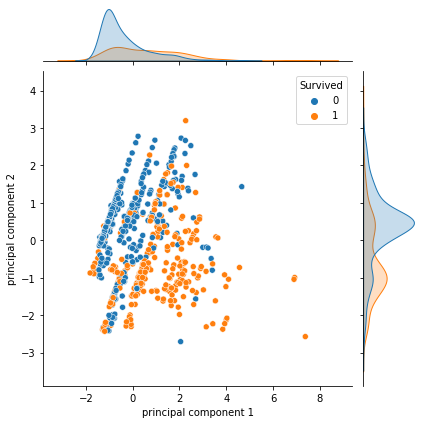

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Survived']]], axis = 1)
sns.jointplot(finalDf['principal component 1'], finalDf['principal component 2'], hue=finalDf['Survived'])

In [ ]:
X = finalDf.drop(['Survived'], axis=1)
y = finalDf['Survived']

W,b = fit(X,y,0.01,1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


## Linear regression

In [ ]:
import math
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from   tqdm import tqdm_notebook

train = pd.read_csv('/content/student_scores.csv')
display(train.head())
X = train['Hours']
y = train['Scores']

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


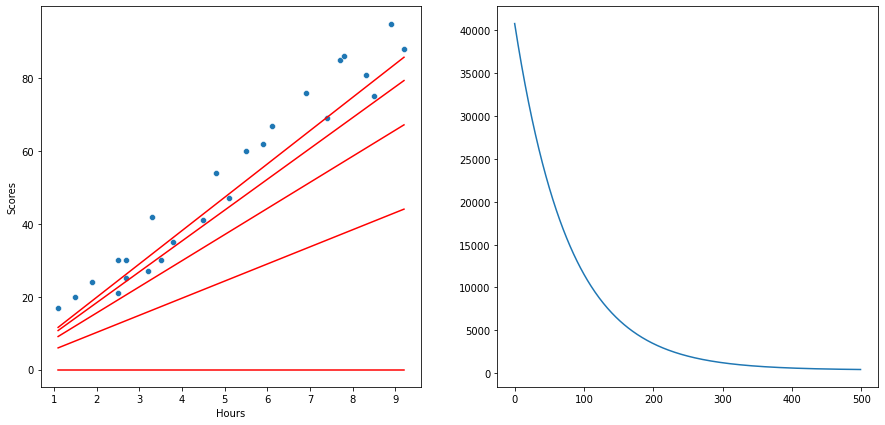

In [ ]:
# Vanilla Gradient descent
W = np.zeros(train.shape[1]-1)
b = np.zeros(train.shape[1]-1)
epochs=500
alpha = 0.0001
n = float(len(X))

def loss(y,y_pred):
  return np.sum((y-y_pred)**2)/2

losses=[]
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours', y='Scores', data=train)

for i in tqdm_notebook(range(epochs)):
  y_pred = W*X + b
  losses.append(loss(y,y_pred))
  dw = (-2/n) * sum(X * (y - y_pred))
  db = (-2/n) * sum(y - y_pred)
  W -= alpha*dw
  b -= alpha*db
  if i%100==0:
    ax1.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
  else :
    continue
ax2 = plt.subplot(1, 2, 2)
ax2.plot(losses)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


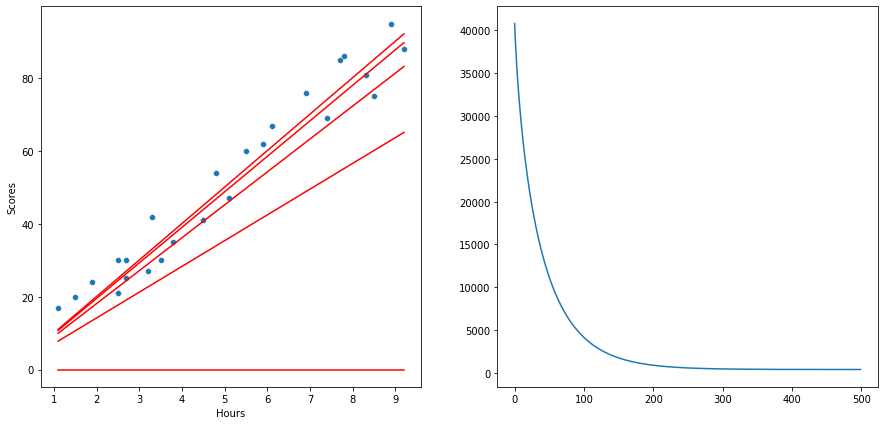

In [ ]:
## Adagrad optimisation
W = np.zeros(train.shape[1]-1)
b = np.zeros(train.shape[1]-1)
epochs=500
alpha = 0.01
n = float(len(X))
losses=[]
s=0
epsilon=10**-7

def loss(y,y_pred):
  return np.sum((y-y_pred)**2)/2

plt.figure(figsize=(15,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours', y='Scores', data=train)

for i in tqdm_notebook(range(epochs)):
  y_pred = W*X + b
  losses.append(loss(y,y_pred))
  
  #getting the derivatives
  dw = (-2/n) * sum(X * (y - y_pred))
  db = (-2/n) * sum(y - y_pred)
  s += dw**2

  #updating values
  W -= (alpha/math.sqrt(s**0.5+epsilon))*dw
  b -= alpha*b
  
  #plotting the line
  if i%100==0:
    ax1.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
  
  else :
    continue

ax2 = plt.subplot(1, 2, 2)
ax2.plot(losses)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(X).reshape(25, -1),y)
y_pred = lr.predict(np.array(X).reshape(25, -1))

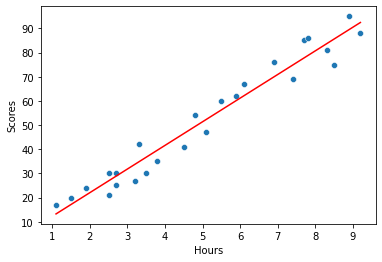

In [ ]:
sns.scatterplot(x='Hours', y='Scores', data=train)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')

In [ ]:
print(lr.coef_)
print(W)

[9.77580339]
[10.11745326]
